# Tarea 1

### Carga de Librerias

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os #Libreria para verificar los archivos que estan en la carpeta
import missingno as msno

In [9]:
os.listdir()

['bank_marketing (1).csv',
 'bank_marketing (3).xlsx',
 'Tarea Mag 25_2.pdf',
 'Tarea1.ipynb']

### Carga de datos

In [ ]:
data = pd.read_csv("bank_marketing (1).csv")
data.head(5) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Revision de valores faltantes

<Axes: >

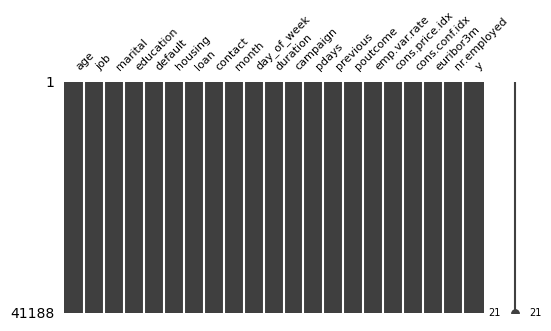

In [24]:
msno.matrix(data, figsize=(6,3), fontsize=8) # No tiene nulos

<Axes: >

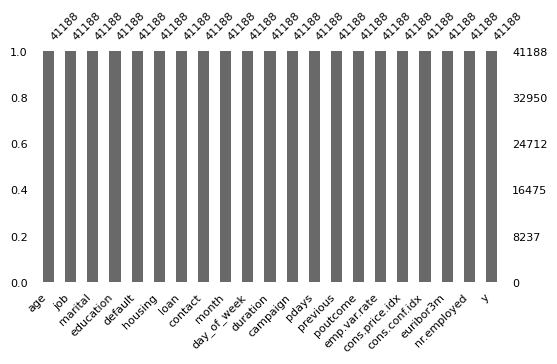

In [23]:
msno.bar(data, figsize=(6, 3), fontsize = 8)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Pregunta 1

In [58]:
#Codigo que divide variables cuantitativas y qualitativas para poder graficar
var_quantitative = [col for col in data.columns if data[col].dtype in ("int64", "float64")]
var_qualitative = [col for col in data.columns if col not in var_quantitative and col != "y"]

In [59]:
print(len(var_quantitative))
print(len(var_qualitative))

10
10


In [60]:
data["y"].value_counts() #Hay clara diferencia de proporcion

y
no     36548
yes     4640
Name: count, dtype: int64

In [ ]:
def graficar_variable_cuanatitativa_countplot(lista):
    columnas = 4
    filas = 3

    fig, axes = plt.subplots(filas, columnas, figsize = (15,10))
    axes= axes.flatten()

    for i, col in enumerate(lista):
        sns.countplot(data, x = col, hue = "y", ax = axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_title(f"{col} vs objetivo")
        axes[i].tick_params(axis = "x", rotation = 45, labelsize = 9)
    plt.tight_layout()
    


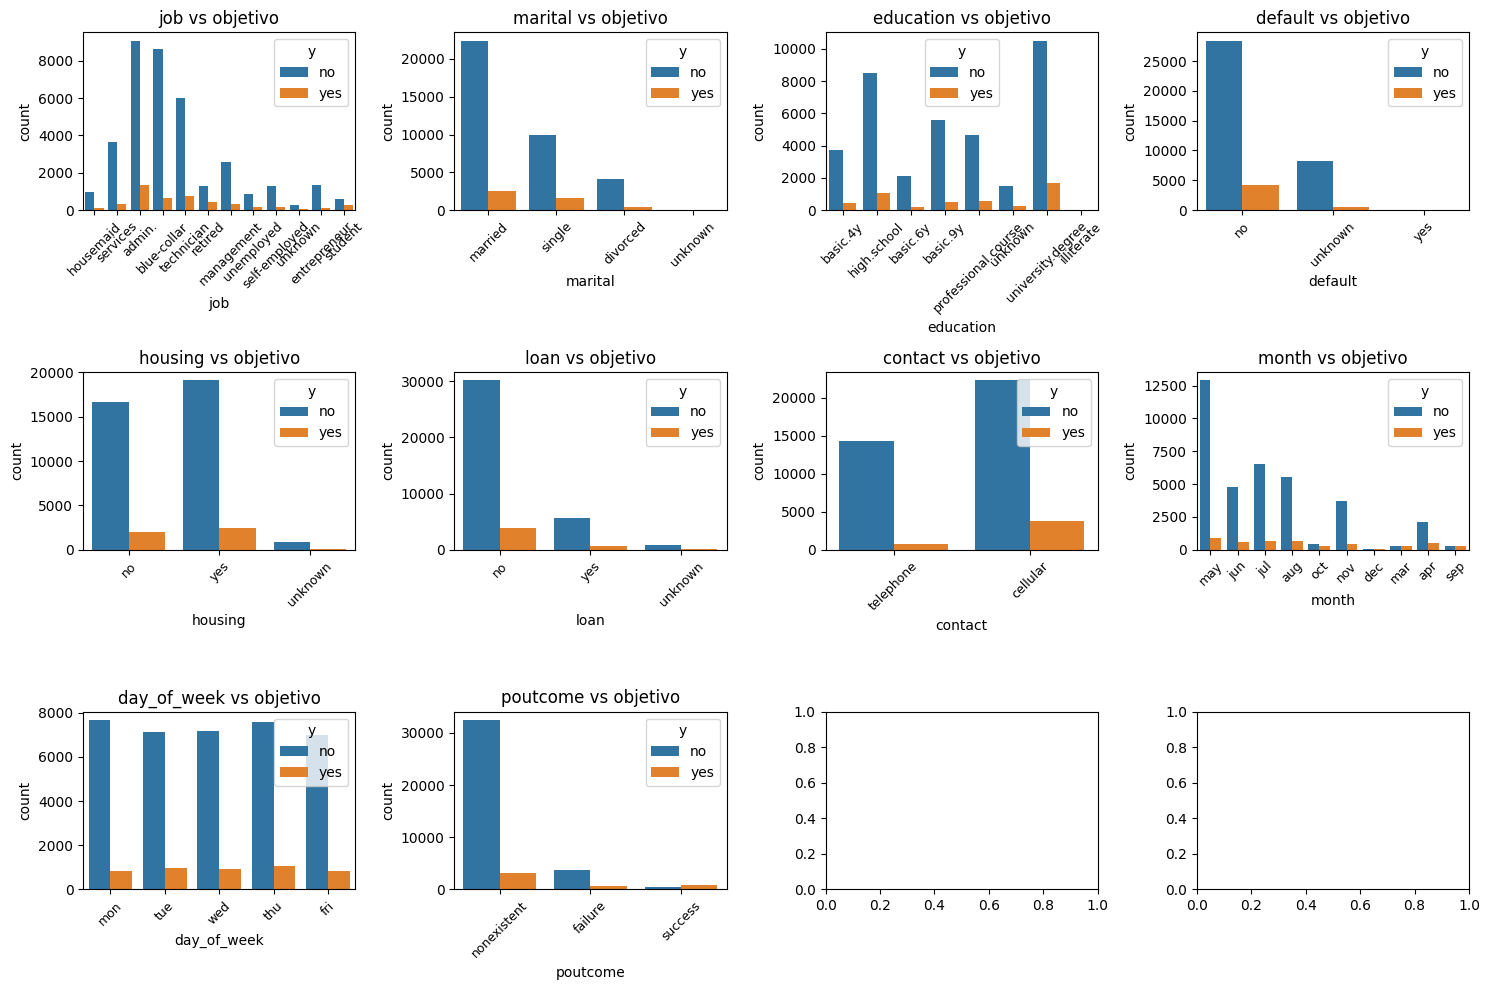

In [ ]:
graficar_variable_cuanatitativa_countplot(var_qualitative)

In [77]:
#proporciones = pd.crosstab(data["poutcome"], data["y"], normalize = "index")

def graficar_variable_cuanatitativa_crosstab(lista):

    columnas = 4
    filas = 3

    fig, axes = plt.subplots(filas,columnas , figsize= (15,10))
    axes = axes.flatten()

    for i, col in enumerate(lista):
        proporciones = pd.crosstab(data[col], data["y"], normalize = "index")
        proporciones.plot(kind = "bar", ax = axes[i], stacked = True)
        axes[i].set_xlabel(col)
        axes[i].set_title(f"{col} vs objetivo")
        axes[i].tick_params(axis = "x", rotation = 45, labelsize = 9)
    plt.tight_layout()
        



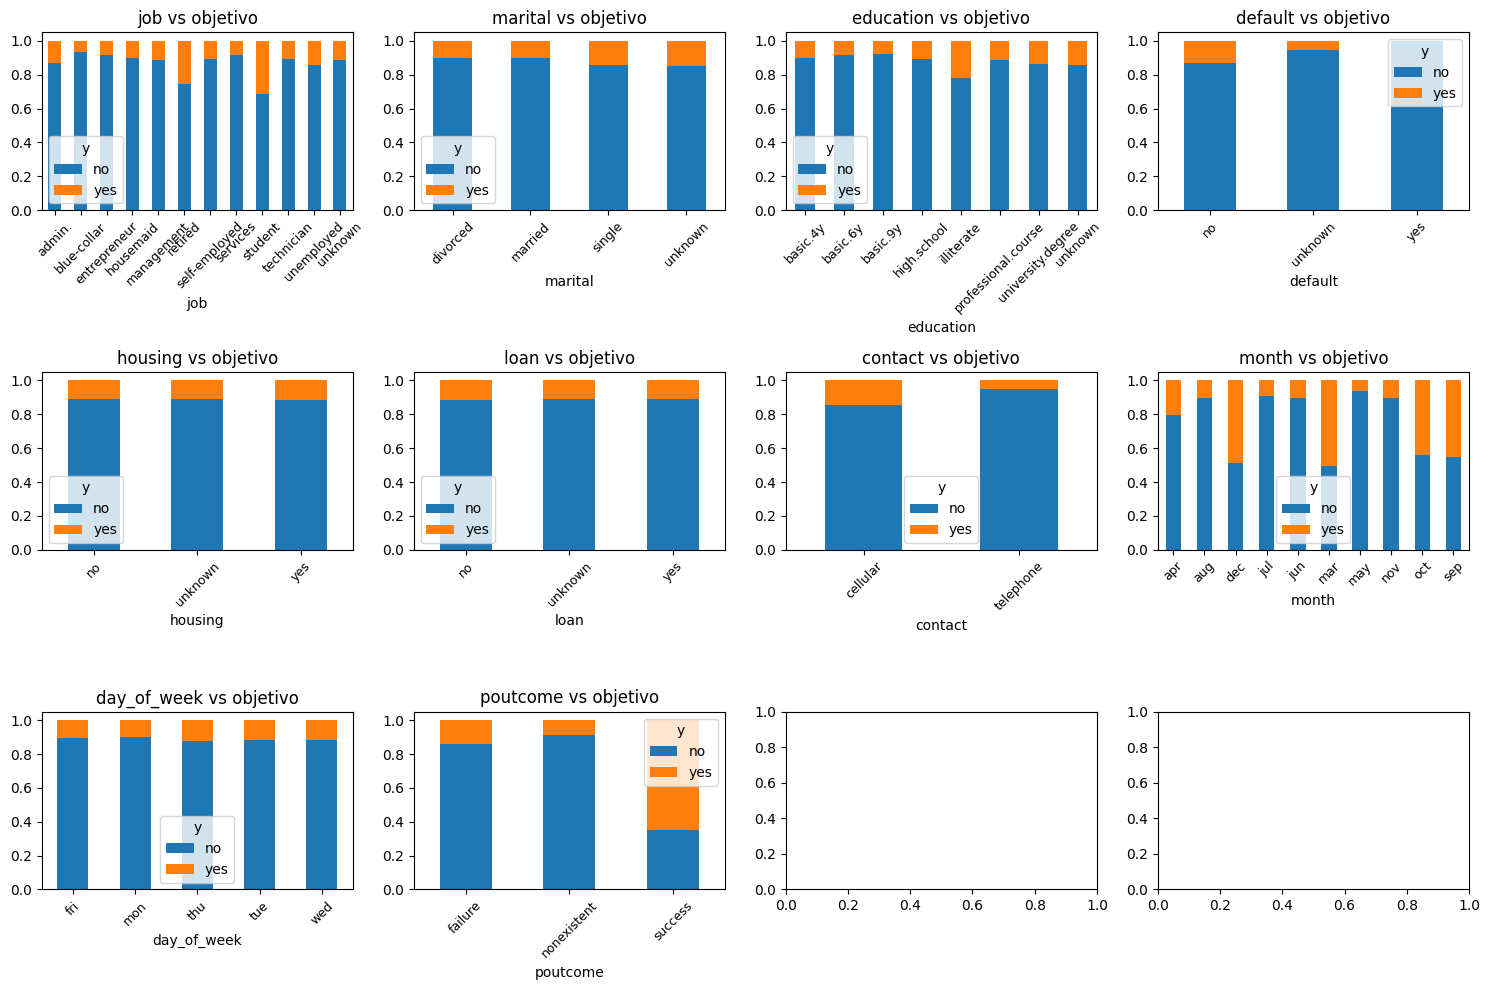

In [78]:
graficar_variable_cuanatitativa_crosstab(var_qualitative)